As you take more samples, especially the large ones, your graph of sample means will look more like a normal distribution

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from prettytable import PrettyTable

In [2]:
data = pd.read_csv("black friday/train.csv")

In [3]:
data.shape

(550068, 12)

In [4]:
data.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [5]:
data = np.array(data["Purchase"].values)

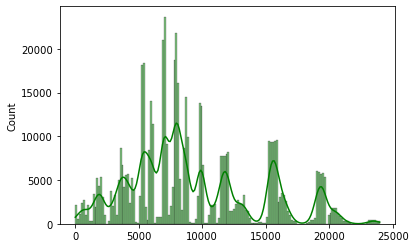

9263.969
5023.061


In [6]:
sns.histplot(data, color='g' ,kde=True)
plt.show()

# population mean
population_mean = np.round(data.mean(),3)
print(population_mean)

# population std
population_std = np.round(data.std(),3)
print(population_std)

In [7]:
def get_means_of_n_samples_with_m_size(data, n, m):
    sample_mean_m_samples_n_ele = []
    for i in range(0,n):
        samples = random.sample(range(0, data.shape[0]), m)
        sample_mean_m_samples_n_ele.append(data[samples].mean())
    return sample_mean_m_samples_n_ele

In [8]:
def central_limit_theorem(data, population_mean , i, j, color, key):
    sns.histplot(np.array(data), color=color, ax=axs[i, j] ,kde = True)
    axs[i, j].axvline(population_mean, linestyle="--", color='r', label="p_mean")
    axs[i, j].axvline(np.array(data).mean(), linestyle="-.", color='b', label="s_mean")
    axs[i, j].set_title(key)
    axs[i, j].legend()

In [9]:
sample_means = dict()

In [10]:
sample_means['100samples_50ele'] = get_means_of_n_samples_with_m_size(data,100, 50)
sample_means['1000samples_50ele'] = get_means_of_n_samples_with_m_size(data,1000, 50)

sample_means['100samples_100ele'] = get_means_of_n_samples_with_m_size(data,100, 100)
sample_means['1000samples_100ele'] = get_means_of_n_samples_with_m_size(data,1000, 100)

sample_means['100samples_1000ele'] = get_means_of_n_samples_with_m_size(data,100, 1000)
sample_means['1000samples_1000ele'] = get_means_of_n_samples_with_m_size(data,1000, 1000)

In [11]:
sample_means.keys()

dict_keys(['100samples_50ele', '1000samples_50ele', '100samples_100ele', '1000samples_100ele', '100samples_1000ele', '1000samples_1000ele'])

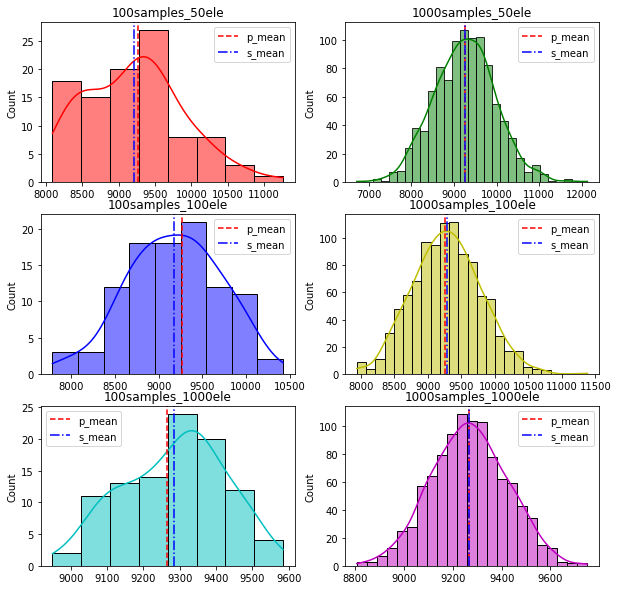

In [12]:
#red, green, blue, yellow, etc
colrs = ['r','g','b','y', 'c', 'm', 'k']
plt_grid  = [(0,0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]
sample_sizes = [(100,50), (1000, 50), (100, 100), (1000, 100), (100, 1000), (100, 1000)]

fig, axs = plt.subplots(3, 2,  figsize=(10, 10))
for i, key in enumerate(sample_means.keys()):
    central_limit_theorem(sample_means[key], population_mean , plt_grid[i][0], plt_grid[i][1] , colrs[i], key)
plt.show()

> if we can observe the thrid row distribution plots, the larger the sample size, the more it looks like Gaussian

Note :
For the Central limit theorem to be valid, the samples have to be reasonably large. How large is that? It depends on how far the population distribution differs from a Gaussian distribution. Assuming the population doesn't have a really unusual distribution, a sample size of 10 or so is generally enough to invoke the Central Limit Theorem.

In [13]:
x = PrettyTable(["#samples_name", "P_Mean", "Sampel mean", "P_Std", "Sample Std", "mu_x"+u"\u2248"+"mu", "std_x"+u"\u2248"+"std/"+u"\u221A"+"n"])

for i, key in enumerate(sample_means.keys()):
    sample_mean = np.round(np.array(sample_means[key]).mean(), 3)
    sample_std = np.round(np.array(sample_means[key]).std(), 3)
    population_std_est = np.round(population_std/np.sqrt(sample_sizes[i][1]), 3)
    
    row = []
    row.append(key)
    row.append(population_mean)
    row.append(sample_mean)
    row.append(population_std)
    row.append(sample_std)
    row.append(str(sample_mean)+u"\u2248"+str(population_mean))
    row.append(str(sample_std)+u"\u2248"+str(population_std_est))
    x.add_row(row)
print(x)

+---------------------+----------+-------------+----------+------------+-------------------+-----------------+
|    #samples_name    |  P_Mean  | Sampel mean |  P_Std   | Sample Std |      mu_x≈mu      |   std_x≈std/√n  |
+---------------------+----------+-------------+----------+------------+-------------------+-----------------+
|   100samples_50ele  | 9263.969 |   9213.827  | 5023.061 |  672.268   | 9213.827≈9263.969 | 672.268≈710.368 |
|  1000samples_50ele  | 9263.969 |   9253.34   | 5023.061 |  721.271   |  9253.34≈9263.969 | 721.271≈710.368 |
|  100samples_100ele  | 9263.969 |   9178.977  | 5023.061 |  528.571   | 9178.977≈9263.969 | 528.571≈502.306 |
|  1000samples_100ele | 9263.969 |   9285.349  | 5023.061 |  505.686   | 9285.349≈9263.969 | 505.686≈502.306 |
|  100samples_1000ele | 9263.969 |   9284.996  | 5023.061 |  139.771   | 9284.996≈9263.969 | 139.771≈158.843 |
| 1000samples_1000ele | 9263.969 |   9267.503  | 5023.061 |  156.032   | 9267.503≈9263.969 | 156.032≈158.843 |
+

<strong><font color='green'>Observations:</font></strong>
1. If you check the above stats, we can observe the distribution of sample means, is having mean <font color='red'>$\mu_{x} \approx \mu$</font> and <font color='red'>$\sigma_{x}\approx \frac{\sigma}{\sqrt{n}}$</font>

<ul style="font-family:'Georgia';font-size:18px" >
<strong>Central Limit Theorem says: </strong>
<br>
<br>
<li>
The sampling distribution of the sample mean <font color='red'>$\overline{X}$</font>  is approximately normally distributed with mean <font color='red'>$\mu$</font> and standard deviation <font color='red'>$\frac{\sigma}{\sqrt{n}}$</font>. if the original distributions are non-normal.
</li>
<br>
<li>
The larger the sample size <font color='red'>$n$</font> is, the more normally distributed the sampling distribution will be and the more tightly it will converge about the true population mean <font color='red'>$\mu$</font>.
</li>
<br>
<li>
The sampling distribution of the sample mean <font color='red'>$\overline{X}$</font> is exactly normally distributed with mean <font color='red'>$\mu$</font> and standard deviation <font color='red'>$\frac{\sigma}{\sqrt{n}}$</font> if the original distributions are normal.</li>
</ul>